In [2]:
%%bash
wget -q https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh -O miniconda.sh
chmod +x miniconda.sh
./miniconda.sh -b -p /content/miniconda

PREFIX=/content/miniconda
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /content/miniconda

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py37h261ae71_2
    - chardet==3.0.4=py37h06a4308_1003
    - conda-package-handling==1.7.2=py37h03888b9_0
    - conda==4.9.2=py37h06a4308_0
    - cryptography==3.2.1=py37h3c74f83_1
    - idna==2.10=py_0
    - ld_impl_linux-64==2.33.1=h53a641e_7
    - libedit==3.1.20191231=h14c3975_1
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.1.0=hdf63c60_0
    - libstdcxx-ng==9.1.0=hdf63c60_0
    - ncurses==6.2=he6710b0_1
    - openssl==1.1.1h=h7b6447c_0
    - pip==20.2.4=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.20=py_2
    - pyopenssl==19.1.0=pyhd3eb1b0_1
    - pysocks==1.7.1=py37_1
    - python==3.7.9=h7579374_0
    - readline==8.0=h

In [3]:
%%bash
/content/miniconda/bin/conda init bash

no change     /content/miniconda/condabin/conda
no change     /content/miniconda/bin/conda
no change     /content/miniconda/bin/conda-env
no change     /content/miniconda/bin/activate
no change     /content/miniconda/bin/deactivate
no change     /content/miniconda/etc/profile.d/conda.sh
no change     /content/miniconda/etc/fish/conf.d/conda.fish
no change     /content/miniconda/shell/condabin/Conda.psm1
no change     /content/miniconda/shell/condabin/conda-hook.ps1
no change     /content/miniconda/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /content/miniconda/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [4]:
%%bash
source /content/miniconda/bin/activate
conda create -n schp python=3.7 -y

Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /content/miniconda/envs/schp

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2025.12.2  |       h06a4308_0         125 KB
    certifi-2022.12.7          |   py37h06a4308_0         150 KB
    ld_impl_linux-64-2.44      |       h153f514_2         672 KB
    libffi-3.4.4               |       h6a678d5_1         141 KB
    libgcc-15.2.0              |       h69a1729_7         806 KB
    libgcc-ng-15.2.0           |       h166f726_7          28 KB
    libgomp-15.2.0             |       h4751f2c_7         436 KB
    libstdcxx-15.2.0           |       h39759b7_7      



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [5]:
%%bash
source /content/miniconda/bin/activate schp
python --version

Python 3.7.16


In [6]:
%%bash
source /content/miniconda/bin/activate schp
conda install pytorch=1.7.1 torchvision cudatoolkit=11.0 -c pytorch -y

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
  - defaults/linux-64::libtiff-4.2.0-h85742a9_0, defaults/linux-64::libwebp-base-1.6.0-hb7bb969_0, defaults/linux-64::olefile-0.46-py37_0, defaults/linux-64::pillow-8.2.0-py37he98fc37_0
  - defaults/linux-64::giflib-5.2.2-h5eee18b_0, defaults/linux-64::libtiff-4.1.0-h2733197_1, defaults/linux-64::libwebp-1.2.0-h89dd481_0, defaults/linux-64::pillow-9.3.0-py37hace64e9_1done

## Package Plan ##

  environment location: /content/miniconda/envs/schp

  added / updated specs:
    - cudatoolkit=11.0
    - pytorch=1.7.1
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    cudatoolkit-11.0.221       |       h6bb024c_0       622.9 MB
    flit-core-3.6.0            |     pyhd3eb1b0_0    



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [7]:
%%bash
source /content/miniconda/bin/activate schp
python - << EOF
import torch
print(torch.__version__)
print(torch.cuda.is_available())
EOF

1.7.1
True


In [8]:
%%bash
source /content/miniconda/bin/activate schp
git clone https://github.com/GoGoDuck912/Self-Correction-Human-Parsing.git
cd Self-Correction-Human-Parsing
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 8.5 MB/s eta 0:00:00


Cloning into 'Self-Correction-Human-Parsing'...


In [9]:
%%bash
source /content/miniconda/bin/activate schp
pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.1 MB/s eta 0:00:00


download pre trained model

In [10]:
%%bash
source /content/miniconda/bin/activate schp
cd Self-Correction-Human-Parsing

pip install -q gdown
mkdir -p checkpoints

gdown --id 1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH -O checkpoints/schp.pth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.9 MB/s eta 0:00:00


/content/miniconda/envs/schp/lib/python3.7/site-packages/gdown/cli.py:142: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From (original): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
From (redirected): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH&confirm=t&uuid=b26fa962-427e-4cda-9842-7e715269e08e
To: /content/Self-Correction-Human-Parsing/checkpoints/schp.pth
100%|██████████| 267M/267M [00:00<00:00, 362MB/s]


In [11]:
%%bash
source /content/miniconda/bin/activate schp
cd Self-Correction-Human-Parsing
ls -lh checkpoints


total 256M
-rw-r--r-- 1 root root 256M Jan 19 14:56 schp.pth


In [13]:
from PIL import Image #convert image to rgb

img = Image.open("/content/demo_input/demo.jpg").convert("RGB")
img.save("/content/demo_input/person.jpg", format="JPEG", quality=95)

FileNotFoundError: [Errno 2] No such file or directory: '/content/demo_input/demo.jpg'

Patch cv2 image reading with PIL

In [14]:
%%bash
grep -n "cv2.imread" -n Self-Correction-Human-Parsing/datasets/simple_extractor_dataset.py


53:        img = cv2.imread(img_path, cv2.IMREAD_COLOR)


In [15]:
from pathlib import Path

file_path = Path("Self-Correction-Human-Parsing/datasets/simple_extractor_dataset.py")

text = file_path.read_text()

old = "img = cv2.imread(img_path, cv2.IMREAD_COLOR)"
new = (
    "from PIL import Image\n"
    "        import numpy as np\n"
    "        img = np.array(Image.open(img_path).convert(\"RGB\"))"
)

if old not in text:
    raise RuntimeError("cv2.imread line not found — aborting")

text = text.replace(old, new)

file_path.write_text(text)

print("PATCH APPLIED SUCCESSFULLY")


PATCH APPLIED SUCCESSFULLY


In [16]:
%%bash
source /content/miniconda/bin/activate schp
cd Self-Correction-Human-Parsing

python simple_extractor.py \
  --input /content/demo_input \
  --output /content/demo_output \
  --model-restore checkpoints/schp.pth


Evaluating total class number 20 with ['Background', 'Hat', 'Hair', 'Glove', 'Sunglasses', 'Upper-clothes', 'Dress', 'Coat', 'Socks', 'Pants', 'Jumpsuits', 'Scarf', 'Skirt', 'Face', 'Left-arm', 'Right-arm', 'Left-leg', 'Right-leg', 'Left-shoe', 'Right-shoe']


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


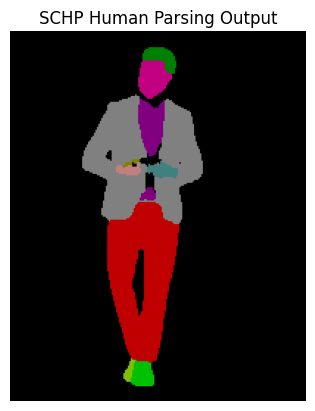

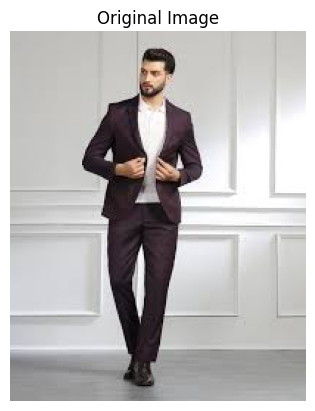

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

parse = Image.open("/content/demo_output/person.png")
plt.imshow(parse)
plt.title("SCHP Human Parsing Output")
plt.axis("off")

original = Image.open("/content/demo_input/person.jpg")
plt.figure()
plt.title("Original Image")
plt.axis("off")
plt.imshow(original)

